In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 912 kB/s 


In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-23 20:14:59--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.006s  

2022-09-23 20:15:00 (229 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge
from fast_ml.model_development import train_valid_test_split
from sklearn.metrics import mutual_info_score
%matplotlib inline

In [5]:
df=pd.read_csv('housing.csv')
data=df.copy()

In [6]:
#Question 1:
df=df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df.total_bedrooms=df.total_bedrooms.fillna(0)

In [9]:
df = df.assign(rooms_per_household=df.total_rooms/df.households,bedrooms_per_room=df.total_bedrooms/df.total_rooms,population_per_household=df.population/df.households)

In [11]:
df.isna().sum()

latitude                    0
longitude                   0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [12]:
df.ocean_proximity.describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [13]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
df=pd.get_dummies(df)

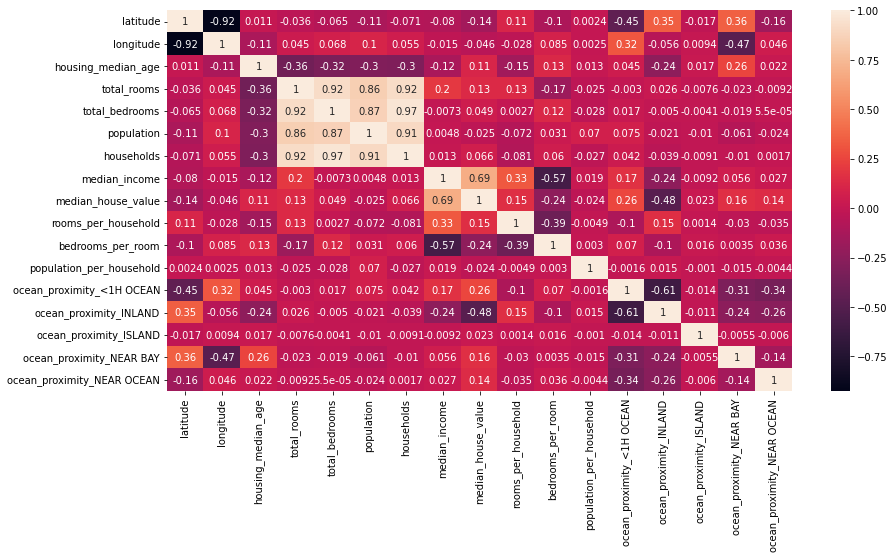

In [15]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
#converts numerical column to categorical based on condition
mean=np.mean(df.median_house_value)
df['median_house_value']=df.median_house_value.apply(lambda x: 1 if x > mean else 0)

In [17]:
#df.median_house_value.value_counts()
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [18]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='median_house_value',train_size=0.6,valid_size=0.2,test_size=0.2,random_state=42)

In [19]:
def mutual_info(series):
  return mutual_info_score(series, y_train)

round(X_train.apply(mutual_info).sort_values(ascending=True),2)

ocean_proximity_ISLAND        0.00
ocean_proximity_NEAR OCEAN    0.01
ocean_proximity_NEAR BAY      0.01
housing_median_age            0.01
ocean_proximity_<1H OCEAN     0.03
households                    0.08
total_bedrooms                0.09
ocean_proximity_INLAND        0.10
latitude                      0.15
population                    0.17
longitude                     0.18
total_rooms                   0.27
median_income                 0.52
population_per_household      0.64
rooms_per_household           0.65
bedrooms_per_room             0.65
dtype: float64

In [20]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [21]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [22]:
y_pred=model.predict(X_valid)

In [23]:
validation_accuracy=model.score(X_valid,y_valid)
validation_accuracy

0.8255813953488372

In [24]:
test_accuracy=model.score(X_test,y_test)
test_accuracy

0.841327519379845

In [25]:
features=['total_rooms','total_bedrooms','population','households']

for f in features:

  model.fit(X_train.drop(columns=[f]),y_train)
  current=model.score(X_test.drop(columns=[f]),y_test)
  print(f'without feature -> {f} = {current} : difference = {current-validation_accuracy}')



without feature -> total_rooms = 0.8398740310077519 : difference = 0.014292635658914699
without feature -> total_bedrooms = 0.84375 : difference = 0.018168604651162767
without feature -> population = 0.8326065891472868 : difference = 0.007025193798449569
without feature -> households = 0.8389050387596899 : difference = 0.013323643410852681


In [26]:
#Now for regression!



In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [28]:
df1=pd.read_csv('housing.csv')
df1=df1[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]
df1.total_bedrooms.fillna(df.total_bedrooms.median(),inplace=True)
df1=pd.get_dummies(df1)
df1['median_house_value']=np.log1p(df['median_house_value'])

In [29]:
df1.isna().sum()

latitude                      0
longitude                     0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [30]:
df1 = df1.assign(rooms_per_household=df1.total_rooms/df1.households,bedrooms_per_room=df1.total_bedrooms/df1.total_rooms,population_per_household=df1.population/df1.households)

In [31]:
df1.isna().sum()

latitude                      0
longitude                     0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
dtype: int64

In [32]:
X_tr, y_tr, X_val, y_val, X_t, y_t = train_valid_test_split(df1, target='median_house_value',train_size=0.6,valid_size=0.2,test_size=0.2,random_state=42)

In [33]:
score={}
alpha = [0, 0.01, 0.1, 1, 10]

for a in alpha:
  model = Ridge(alpha=a, solver="sag",random_state=42).fit(X_tr,y_tr)
  y_pred=model.predict(X_t)
  score[a]=round(sqrt(mean_squared_error(y_t, y_pred)),3)
  print(f'rmse at alpha = {a} ---> {score[a]}')
  print(f'score -> {round(model.score(X_t,y_t),5)}\n')

rmse at alpha = 0 ---> 0.321
score -> 0.11951

rmse at alpha = 0.01 ---> 0.321
score -> 0.11951

rmse at alpha = 0.1 ---> 0.321
score -> 0.11951

rmse at alpha = 1 ---> 0.321
score -> 0.11951

rmse at alpha = 10 ---> 0.321
score -> 0.11951

